# **Seminário PLN**


## **Tema**: Fundamentos do funcionamento do LLM do Google, BERT
## **Artigo**: A Complete Guide to BERT with Code


**Link do Artigo:** https://towardsdatascience.com/a-complete-guide-to-bert-with-code-9f87602e4a11






**João Pedro Genga Carneiro,   RA: 11201810740**


**Vitor Inacio da Silva,    RA: 11201810048**



# 1 - Aspectos principais do BERT

A estreia do modelo Transformer em 2017 desencadeou uma onda de novos modelos, incluindo o GPT da OpenAI em 2018, um modelo baseado apenas em decodificadores focado na geração de linguagem natural (NLG), e o BERT do Google, um modelo baseado apenas em codificadores projetado para a compreensão da linguagem natural (NLU). Modelos GPT, como os usados no ChatGPT, são excelentes em gerar texto prevendo a próxima palavra em uma sequência, tornando-os ideais para tarefas como conversação e tradução. O BERT, por outro lado, é excelente em entender texto ao criar representações detalhadas das sequências de entrada, sendo mais adequado para tarefas como análise de sentimento e reconhecimento de entidades nomeadas.


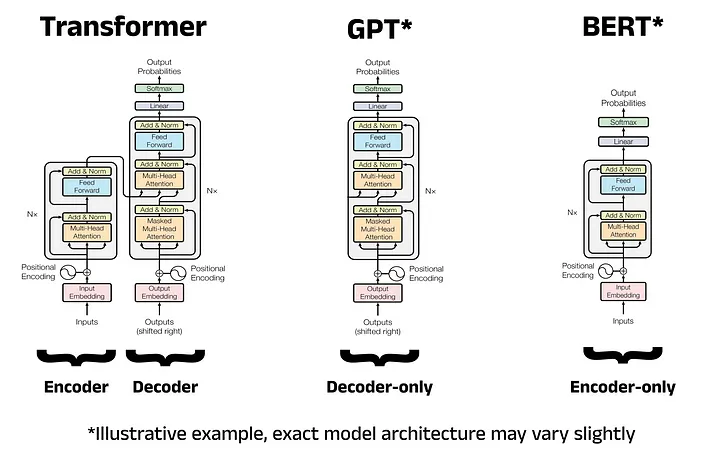

Ambos os modelos usam uma abordagem de pré-treinamento e ajuste fino, onde um grande modelo base é pré-treinado em vastas quantidades de dados e, em seguida, ajustado para tarefas específicas, reduzindo significativamente o tempo e os dados necessários para o treinamento. A principal vantagem do BERT é seu contexto bidirecional, permitindo que ele entenda as palavras em relação tanto às palavras precedentes quanto às subsequentes, ao contrário do contexto unidirecional do GPT, que considera apenas as palavras precedentes. No entanto, a bidirecionalidade do BERT aumenta o tempo de treinamento e limita sua capacidade de gerar novas sequências, tornando-o menos eficaz para tarefas que exigem a geração de texto.

Em resumo, o GPT é melhor para gerar texto, enquanto o BERT é superior em entender e analisar texto devido à sua arquitetura bidirecional.

# 2 - Objetivos de Pré-Treinamento

## 1. Modelo de Linguagem Mascarada e Previsão da Próxima Sentença

O texto fornece uma explicação detalhada dos objetivos de pré-treinamento do BERT, especificamente o Modelo de Linguagem Mascarada (MLM) e as tarefas de Previsão da Próxima Sentença (NSP), que são fundamentais para a capacidade do BERT de entender o contexto linguístico.

### Modelo de Linguagem Mascarada (MLM)

- O MLM é projetado para treinar o BERT como um modelo bidirecional, ou seja, ele usa tanto o contexto à esquerda quanto à direita de uma sentença para fazer previsões.
- A tarefa envolve mascarar aleatoriamente 15% das palavras em uma sentença e treinar o BERT para prever as palavras mascaradas com base no contexto ao redor.
- Para lidar com o problema de que o token `[MASK]` aparece apenas no treinamento e não durante o uso real, apenas 80% das palavras selecionadas são substituídas por `[MASK]`, enquanto 10% são substituídas por uma palavra aleatória e os 10% restantes permanecem inalterados.

### Previsão da Próxima Sentença (NSP)

- A NSP ajuda o BERT a entender a relação lógica entre duas sentenças, o que é crucial para tarefas como Resposta a Perguntas e Inferência/Compreensão de Linguagem Natural (NLI/NLU).
- O BERT é treinado para determinar se uma sentença logicamente segue outra (`IsNext`) ou não (`NotNext`).
- Os dados de treinamento para a NSP são gerados pareando sentenças que se seguem 50% do tempo, enquanto os outros 50% são pares aleatórios.

## 2. Embeddings de Entrada

O processo de embedding de entrada do BERT envolve três componentes:

1. **Codificação Posicional**: A informação posicional é injetada no embedding de cada token, no entanto, as codificações posicionais no BERT são fixas e não geradas por uma função. Isso significa que o BERT é restrito a 512 tokens em sua sequência de entrada.
2. **Embedding de Segmento**: Vetores que codificam o segmento ao qual cada token pertence são adicionados. Para a tarefa de pré-treinamento MLM ou qualquer outra tarefa que não seja a NSP (que apresenta apenas um `[SEP]`), todos os tokens na entrada são considerados como pertencentes ao segmento A. Para as tarefas NSP, todos os tokens após o segundo `[SEP]` são denominados como segmento B.
3. **Embedding de Token**: Cada token na sequência de entrada é atribuído a um embedding aprendido, que é combinado com embeddings posicionais e de segmento para criar o embedding final e adicionar informações contextuais.

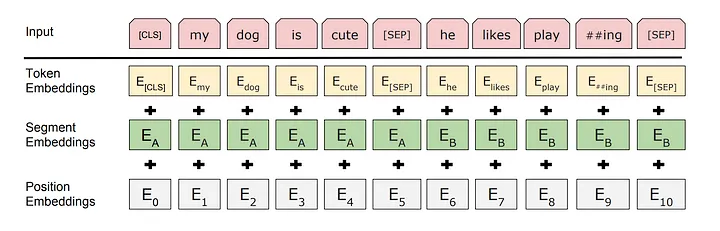

## 3. Tokens Especiais

O BERT usa vários tokens especiais, cada um servindo a um propósito único:

- `[PAD]`: Usado para preencher sequências até um comprimento de 512 tokens.
- `[UNK]`: Representa tokens desconhecidos que não estão no vocabulário do BERT.
- `[CLS]`: Um token de classificação, que é esperado no início de cada sequência, quer seja usado ou não. Este token encapsula a informação de classe para tarefas de classificação e pode ser pensado como uma representação agregada da sequência.
- `[SEP]`: Um token separador usado para distinguir entre dois segmentos em uma única sequência de entrada (por exemplo, na Previsão da Próxima Sentença). Pelo menos um token `[SEP]` é esperado por sequência de entrada, com um máximo de dois. Usado em tarefas como NSP.
- `[MASK]`: Usado na tarefa de MLM para ocultar tokens que o BERT precisa prever.

## 4. Comparação da Arquitetura do BERT Base e BERT Large

Os dois modelos diferem principalmente em quatro categorias:

1. **Número de blocos de codificador, N**: o número de blocos de codificador empilhados uns sobre os outros.
2. **Número de cabeças de atenção por bloco de codificador**: as attention heads calculam os embeddings vetoriais contextuais para a sequência de entrada. Como o BERT usa atenção multi-head, esse valor se refere ao número de heads por camada de codificador.
3. **Tamanho da camada oculta na rede feedforward**: a camada linear consiste em uma camada oculta com um número fixo de neurônios (por exemplo, 3072 para o BERT Base) que alimenta uma camada de saída que pode ter vários tamanhos. O tamanho da camada de saída depende da tarefa. Por exemplo, um problema de classificação binária exigirá apenas dois neurônios de saída, um problema de classificação multiclasse com dez classes exigirá dez neurônios, e assim por diante.
4. **Total de parâmetros**: o número total de pesos e vieses no modelo. Na época, um modelo com centenas de milhões era muito grande mas, pelos padrões de hoje, esses valores são comparativamente pequenos.

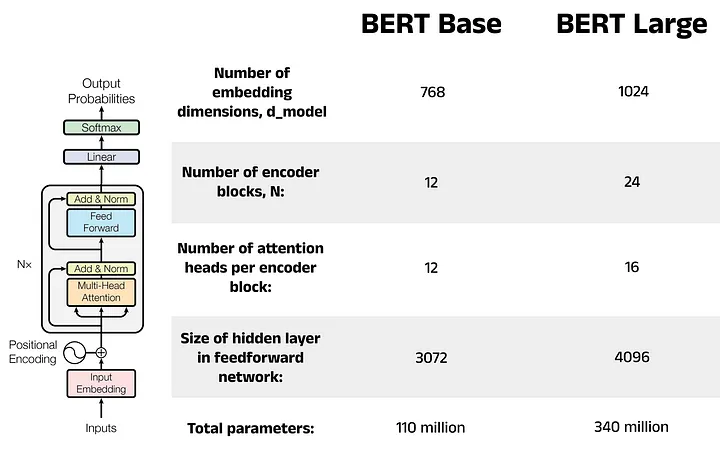


# Pré-processamento do córpus de texto

O trecho de código define a função preprocess_dataset, que é crucial para preparar o conjunto de dados para o treinamento de um modelo de aprendizado de máquina. Ele realiza três principais etapas de pré-processamento: primeiro, remove tags de quebra de linha HTML ("<\br>") e espaços em branco desnecessários dos textos das resenhas para limpar o conteúdo; segundo, codifica os rótulos de sentimento, transformando "negative" em 0 e "positive" em 1, facilitando assim a tarefa de classificação binária para o modelo; e terceiro, retorna um DataFrame atualizado que inclui as colunas limpas e codificadas, garantindo que os dados estejam no formato adequado para o treinamento do modelo.

Ao contrário dos modelos de PLN anteriores, os modelos baseados em Transformer, como o BERT, requerem um pré-processamento mínimo. Etapas como a remoção de palavras de parada e pontuação podem ser contraproducentes em alguns casos, pois esses elementos fornecem ao BERT um contexto valioso para entender as frases de entrada. No entanto, ainda é importante inspecionar o texto para verificar possíveis problemas de formatação ou caracteres indesejados.

In [ ]:
def preprocess_dataset(path):
    """ Remover caracteres desnecessários e codificar os rótulos de sentimento.

        O tipo de pré-processamento necessário varia com base no conjunto de dados.
        Para o conjunto de dados IMDb, os textos das resenhas contêm tags de quebra de HTML (<br/>)
        deixadas pelo processo de scraping, além de alguns espaços em branco desnecessários,
        que são removidos. Finalmente, codifique os rótulos de sentimento como 0 para "negativo"
        e 1 para "positivo". Este método assume que o arquivo do conjunto de dados contém
        os cabeçalhos "review" e "sentiment".

        Parâmetros:
            path (str): Um caminho para um arquivo de conjunto de dados contendo o conjunto de dados
                de análise de sentimento. A estrutura do arquivo deve ser a seguinte: uma coluna chamada
                "review" contendo o texto da resenha, e uma coluna chamada "sentiment" contendo o rótulo
                verdadeiro. As opções de rótulo devem ser "negative" e "positive".

        Retorna:
            df_dataset (pd.DataFrame): Um DataFrame contendo os dados brutos carregados
                do caminho self.dataset. Além das colunas esperadas "review" e "sentiment", são:

                > review_cleaned - uma cópia da coluna "review" com as tags de quebra de HTML
                    e os espaços em branco desnecessários removidos.

                > sentiment_encoded - uma cópia da coluna "sentiment" com os valores "negative"
                    mapeados para 0 e "positive" mapeados para 1.
    """

    df_dataset = pd.read_csv(path)

    df_dataset['review_cleaned'] = df_dataset['review'].\
        apply(lambda x: x.replace('<br />', ''))

    df_dataset['review_cleaned'] = df_dataset['review_cleaned'].\
        replace('\s+', ' ', regex=True)

    df_dataset['sentiment_encoded'] = df_dataset['sentiment'].\
        apply(lambda x: 0 if x == 'negative' else 1)

    print(df_dataset)

    return df_dataset

# Treinando o modelo BERT

O trecho de código abaixo define a classe FineTuningPipeline que gerencia o ajuste fino de um modelo BERT para tarefas de classificação de sequência. Primeiro, ele inicializa parâmetros, como o conjunto de dados, o tokenizador, o modelo, o otimizador e a função de perda, verifica se há GPU disponível para acelerar o treinamento e em seguida, a classe tokeniza o conjunto de dados, divide-o em conjuntos de treino e validação, e cria dataloaders para ambos. O ajuste fino do modelo é realizado em várias épocas, com o treinamento e a validação ocorrendo em cada época. Durante o treinamento, o modelo é atualizado com gradientes calculados, e durante a validação, a perda e a acurácia são calculadas. Após o treinamento, o método predict faz previsões para novos dados, retornando probabilidades para cada classe. A classe também inclui métodos para definir sementes aleatórias para reprodutibilidade e criar um scheduler para a taxa de aprendizado.

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader
from transformers import (
    BertForSequenceClassification,
    BertTokenizer,
    get_linear_schedule_with_warmup)


class FineTuningPipeline:

    def __init__(
            self,
            dataset,
            tokenizer,
            model,
            optimizer,
            loss_function = nn.CrossEntropyLoss(),
            val_size = 0.1,
            epochs = 4,
            seed = 42):

        self.df_dataset = dataset
        self.tokenizer = tokenizer
        self.model = model
        self.optimizer = optimizer
        self.loss_function = loss_function
        self.val_size = val_size
        self.epochs = epochs
        self.seed = seed

        # Check if GPU is available for faster training time
        if torch.cuda.is_available():
            self.device = torch.device('cuda:0')
        else:
            self.device = torch.device('cpu')

        # Perform fine-tuning
        self.model.to(self.device)
        self.set_seeds()
        self.token_ids, self.attention_masks = self.tokenize_dataset()
        self.train_dataloader, self.val_dataloader = self.create_dataloaders()
        self.scheduler = self.create_scheduler()
        self.fine_tune()

    def tokenize(self, text):
        """ Tokenizar o texto de entrada e retornar os IDs dos tokens e a máscara de atenção.

                Tokeniza uma string de entrada, definindo um comprimento máximo de 128 tokens.
                Sequências com mais de 128 tokens serão truncadas para esse limite,
                e sequências com menos de 128 tokens serão complementadas com tokens [PAD]
                para atingir esse limite. O tipo de dado dos tensores retornados será o formato
                de tensor do PyTorch. Esses valores de retorno são tensores de tamanho 1 x max_length,
                onde max_length é o número máximo de tokens por sequência de entrada (128 para o BERT).

                Parâmetros:
                    text (str): O texto a ser tokenizado.

                Retorna:
                    token_ids (torch.Tensor): Um tensor de IDs de tokens para cada token na
                        sequência de entrada.

                    attention_mask (torch.Tensor): Um tensor de 1s e 0s onde 1
                        indica que um token pode ser considerado durante o processo de atenção,
                        e 0 indica que um token deve ser ignorado. Isso é usado para impedir que o BERT
                        considere tokens [PAD] durante o seu treinamento/inferência.
        """

        batch_encoder = self.tokenizer.encode_plus(
            text,
            max_length = 128,
            padding = 'max_length',
            truncation = True,
            return_tensors = 'pt')

        token_ids = batch_encoder['input_ids']
        attention_mask = batch_encoder['attention_mask']

        return token_ids, attention_mask

    def tokenize_dataset(self):
        """ Aplicar o método self.tokenize ao conjunto de dados de fine-tuning.

                Tokeniza e retorna a sequência de entrada para cada linha no conjunto de dados de fine-tuning
                dado por self.dataset. Os valores de retorno são tensores de tamanho len_dataset x max_length,
                onde len_dataset é o número de linhas no conjunto de dados de fine-tuning e max_length
                é o número máximo de tokens por sequência de entrada (128 para o BERT).

                Parâmetros:
                    Nenhum.

                Retorna:
                    token_ids (torch.Tensor): Um tensor de tensores contendo IDs de tokens
                    para cada token na sequência de entrada.

                    attention_masks (torch.Tensor): Um tensor de tensores contendo as
                        máscaras de atenção para cada sequência no conjunto de dados de fine-tuning.
        """

        token_ids = []
        attention_masks = []

        for review in self.df_dataset['review_cleaned']:
            tokens, masks = self.tokenize(review)
            token_ids.append(tokens)
            attention_masks.append(masks)

        token_ids = torch.cat(token_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)

        return token_ids, attention_masks

    def create_dataloaders(self):
        """ Criar dataloaders para o conjunto de treino e validação.

                Divida o conjunto de dados tokenizado em conjuntos de treino e validação de acordo com
                o valor de self.val_size. Por exemplo, se self.val_size estiver definido como 0.1,
                90% dos dados serão usados para formar o conjunto de treino e 10% para o
                conjunto de validação. Converta a coluna "sentiment_encoded" (rótulos para cada
                linha) em tensores PyTorch para serem usados nos dataloaders.

                Parâmetros:
                    Nenhum.

                Retorna:
                    train_dataloader (torch.utils.data.dataloader.DataLoader): Um
                        dataloader dos dados de treino, incluindo os IDs dos tokens,
                        máscaras de atenção e rótulos de sentimento.

                    val_dataloader (torch.utils.data.dataloader.DataLoader): Um
                        dataloader dos dados de validação, incluindo os IDs dos tokens,
                        máscaras de atenção e rótulos de sentimento.
        """

        train_ids, val_ids = train_test_split(
                        self.token_ids,
                        test_size=self.val_size,
                        shuffle=False)

        train_masks, val_masks = train_test_split(
                                    self.attention_masks,
                                    test_size=self.val_size,
                                    shuffle=False)

        labels = torch.tensor(self.df_dataset['sentiment_encoded'].values)
        train_labels, val_labels = train_test_split(
                                        labels,
                                        test_size=self.val_size,
                                        shuffle=False)

        train_data = TensorDataset(train_ids, train_masks, train_labels)
        train_dataloader = DataLoader(train_data, shuffle=True, batch_size=16)
        val_data = TensorDataset(val_ids, val_masks, val_labels)
        val_dataloader = DataLoader(val_data, batch_size=16)

        return train_dataloader, val_dataloader

    def create_scheduler(self):
        """ Criar um scheduler linear para a taxa de aprendizado.

                Crie um scheduler com uma taxa de aprendizado que aumenta linearmente de 0
                até um valor máximo (chamado de período de aquecimento), e então diminui linearmente
                até 0 novamente. num_warmup_steps está definido como 0 aqui com base em um exemplo do
                Hugging Face:

                https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2
                d008813037968a9e58/examples/run_glue.py#L308

                https://huggingface.co/docs/transformers/main_classes/optimizer_
                schedules#transformers.get_linear_schedule_with_warmup
        """

        num_training_steps = self.epochs * len(self.train_dataloader)
        scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=0,
            num_training_steps=num_training_steps)

        return scheduler

    def set_seeds(self):
        """ Definir as sementes aleatórias para que os resultados sejam reproduzíveis.

                Parâmetros:
                    Nenhum.

                Retorna:
                    Nenhum.
        """

        np.random.seed(self.seed)
        torch.manual_seed(self.seed)
        torch.cuda.manual_seed_all(self.seed)

    def fine_tune(self):
        """ Treinar o bloco de classificação no modelo BERT.

                Faça o ajuste fino do modelo treinando o bloco de classificação (camada linear)
                situada no topo do modelo BERT. O modelo é treinado com os dados no
                self.train_dataloader e validado no final de cada época com os dados
                no self.val_dataloader. A série de passos é descrita abaixo:

                Treinamento:

                > Crie um dicionário para armazenar a perda média de treinamento e a perda média
                  de validação para cada época.
                > Armazene o tempo no início do treinamento; isso é usado para calcular
                  o tempo total do processo de treinamento.
                > Inicie um loop para treinar o modelo para cada época em self.epochs.

                Para cada época:

                > Mude o modelo para o modo de treinamento. Isso fará com que o modelo se comporte
                  de maneira diferente do modo de avaliação (por exemplo, as camadas de batchnorm e
                  dropout são ativadas no modo de treinamento, mas desativadas no
                  modo de avaliação).
                > Defina a perda de treinamento como 0 no início da época. Isso é usado
                  para rastrear a perda do modelo nos dados de treinamento ao longo das épocas
                  subsequentes. A perda deve diminuir a cada época se o treinamento for
                  bem-sucedido.
                > Armazene o tempo no início da época; isso é usado para calcular
                  o tempo necessário para a conclusão da época.
                > De acordo com as recomendações dos autores do BERT, os dados de treinamento
                  para cada época são divididos em lotes. Faça um loop através do processo de
                  treinamento para cada lote.

                Para cada lote:

                > Mova os IDs dos tokens, máscaras de atenção e rótulos para a GPU, se
                  disponível, para processamento mais rápido; caso contrário, mantenha-os na
                  CPU.
                > Chame o método zero_grad para redefinir os gradientes calculados da
                  iteração anterior deste loop.
                > Passe o lote para o modelo para calcular os logits (previsões
                  baseadas nos pesos e vieses atuais do classificador) bem como a
                  perda.
                > Incrementa a perda total da época. A perda é retornada do
                  modelo como um tensor PyTorch, então extraia o valor float usando o método
                  item.
                > Realize uma passagem backward do modelo e propague a perda através
                  da cabeça do classificador. Isso permitirá que o modelo determine quais
                  ajustes fazer nos pesos e vieses para melhorar seu
                  desempenho no lote.
                > Limite os gradientes para não serem maiores que 1.0 para que o modelo não
                  sofra com o problema de gradientes explodindo.
                > Chame o otimizador para dar um passo na direção da superfície de erro
                  determinada pela passagem backward.

                Após o treinamento de cada lote:

                > Calcule a perda média e o tempo gasto no treinamento da época.

                Etapa de validação para a época:

                > Mude o modelo para o modo de avaliação.
                > Defina a perda de validação como 0. Isso é usado para rastrear a perda do
                  modelo nos dados de validação ao longo das épocas subsequentes. A perda deve
                  diminuir a cada época se o treinamento foi bem-sucedido.
                > Armazene o tempo no início da validação; isso é usado para
                  calcular o tempo necessário para a validação desta época ser
                  concluída.
                > Divida os dados de validação em lotes.

                Para cada lote:

                > Mova os IDs dos tokens, máscaras de atenção e rótulos para a GPU, se
                  disponível, para processamento mais rápido; caso contrário, mantenha-os na
                  CPU.
                > Chame o método no_grad para instruir o modelo a não calcular os
                  gradientes, uma vez que não estaremos realizando nenhuma etapa de otimização aqui,
                  apenas inferência.
                > Passe o lote para o modelo para calcular os logits (previsões
                  baseadas nos pesos e vieses atuais do classificador) bem como a
                  perda.
                > Extraia os logits e rótulos do modelo e mova-os para a CPU
                  (se ainda não estiverem lá).
                > Incrementa a perda e calcule a acurácia com base nos rótulos verdadeiros
                  no dataloader de validação.
                > Calcule a perda e a acurácia média e adicione esses valores ao dicionário de perda.
        """

        loss_dict = {
            'epoch': [i+1 for i in range(self.epochs)],
            'average training loss': [],
            'average validation loss': []
        }

        t0_train = datetime.now()

        for epoch in range(0, self.epochs):

            # Train step
            self.model.train()
            training_loss = 0
            t0_epoch = datetime.now()

            print(f'{"-"*20} Epoch {epoch+1} {"-"*20}')
            print('\nTraining:\n---------')
            print(f'Start Time:       {t0_epoch}')

            for batch in self.train_dataloader:

                batch_token_ids = batch[0].to(self.device)
                batch_attention_mask = batch[1].to(self.device)
                batch_labels = batch[2].to(self.device)

                self.model.zero_grad()

                loss, logits = self.model(
                    batch_token_ids,
                    token_type_ids = None,
                    attention_mask=batch_attention_mask,
                    labels=batch_labels,
                    return_dict=False)

                training_loss += loss.item()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                self.optimizer.step()
                self.scheduler.step()

            average_train_loss = training_loss / len(self.train_dataloader)
            time_epoch = datetime.now() - t0_epoch

            print(f'Average Loss:     {average_train_loss}')
            print(f'Time Taken:       {time_epoch}')

            # Validation step
            self.model.eval()
            val_loss = 0
            val_accuracy = 0
            t0_val = datetime.now()

            print('\nValidation:\n---------')
            print(f'Start Time:       {t0_val}')

            for batch in self.val_dataloader:

                batch_token_ids = batch[0].to(self.device)
                batch_attention_mask = batch[1].to(self.device)
                batch_labels = batch[2].to(self.device)

                with torch.no_grad():
                    (loss, logits) = self.model(
                        batch_token_ids,
                        attention_mask = batch_attention_mask,
                        labels = batch_labels,
                        token_type_ids = None,
                        return_dict=False)

                logits = logits.detach().cpu().numpy()
                label_ids = batch_labels.to('cpu').numpy()
                val_loss += loss.item()
                val_accuracy += self.calculate_accuracy(logits, label_ids)


            average_val_accuracy = val_accuracy / len(self.val_dataloader)
            average_val_loss = val_loss / len(self.val_dataloader)
            time_val = datetime.now() - t0_val

            print(f'Average Loss:     {average_val_loss}')
            print(f'Average Accuracy: {average_val_accuracy}')
            print(f'Time Taken:       {time_val}\n')

            loss_dict['average training loss'].append(average_train_loss)
            loss_dict['average validation loss'].append(average_val_loss)

        print(f'Total training time: {datetime.now()-t0_train}')

    def calculate_accuracy(self, preds, labels):
        """ Calcular a acurácia das previsões do modelo em relação aos rótulos verdadeiros.

                Parâmetros:
                    preds (np.array): O rótulo previsto pelo modelo.
                    labels (np.array): O rótulo verdadeiro.

                Retorna:
                    accuracy (float): A acurácia como uma porcentagem das previsões corretas.
        """

        pred_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()
        accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)

        return accuracy

    def predict(self, dataloader):
        """ Retornar as probabilidades previstas para cada classe para o texto de entrada.

                Parâmetros:
                    dataloader (torch.utils.data.DataLoader): Um DataLoader contendo
                        os IDs dos tokens e máscaras de atenção para o texto no qual realizar
                        a inferência.

                Retorna:
                    probs (PyTorch.Tensor): Um tensor contendo os valores de probabilidade
                        para cada classe, conforme previsto pelo modelo.
        """

        self.model.eval()
        all_logits = []

        for batch in dataloader:
            batch_token_ids, batch_attention_mask = tuple(t.to(self.device) \
                for t in batch)[:2]

            with torch.no_grad():
                output = self.model(batch_token_ids, attention_mask=batch_attention_mask)
                logits = output.logits  # Access logits directly from the output object

            all_logits.append(logits)

        all_logits = torch.cat(all_logits, dim=0)

        probs = F.softmax(all_logits, dim=1).cpu().numpy()
        return probs

# Inicializando parâmetros de treino

O código a seguir, carrega e processa um conjunto de dados de avaliações de um arquivo CSV, inicializa um tokenizador BERT para converter texto em IDs de tokens e máscaras de atenção, e configura um modelo BERT para classificação binária. Em seguida, define um otimizador AdamW para ajustar os parâmetros do modelo. Finalmente, cria uma instância da classe FineTuningPipeline, que gerencia o ajuste fino do modelo, incluindo a tokenização dos dados, a divisão entre treinamento e validação, e o treinamento do modelo por 4 épocas com uma semente aleatória para garantir resultados reproduzíveis.

In [ ]:
# Inicialize os parâmetros
# ------------------------

# Carregue e processe o conjunto de dados a partir do arquivo CSV.
# A função preprocess_dataset deve retornar um DataFrame com as colunas 'review_cleaned' e 'sentiment_encoded'.
dataset = preprocess_dataset('small_dataset.csv')

# Inicialize o tokenizador BERT.
# O tokenizador converte texto em IDs de tokens e máscaras de atenção para o modelo BERT.
# 'bert-base-uncased' é um modelo BERT pré-treinado que usa tokens em minúsculas.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Inicialize o modelo BERT para classificação de sequência.
# Esse modelo é pré-treinado para tarefas de linguagem e será ajustado para classificação.
# num_labels=2 indica que o modelo será usado para classificação binária (por exemplo, positivo vs. negativo).
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2)

# Inicialize o otimizador AdamW.
# O AdamW é usado para atualizar os parâmetros do modelo durante o treinamento.
optimizer = AdamW(model.parameters())

# Ajuste fino do modelo usando a classe
# --------------------------------------

# Crie uma instância da classe FineTuningPipeline.
# Esta classe cuida de todo o processo de ajuste fino, incluindo tokenização, divisão dos dados e treinamento.

# Parâmetros:
# dataset: O conjunto de dados pré-processado (DataFrame) com texto e rótulos.
# tokenizer: O tokenizador BERT para converter texto em IDs e máscaras.
# model: O modelo BERT para classificação.
# optimizer: O otimizador AdamW para ajustar os parâmetros do modelo.
# val_size: A proporção dos dados a ser usada para validação (10% aqui).
# epochs: O número de épocas para treinar o modelo (4 épocas neste caso).
# seed: A semente aleatória para garantir a reprodutibilidade.

fine_tuned_model = FineTuningPipeline(
    dataset = dataset,
    tokenizer = tokenizer,
    model = model,
    optimizer = optimizer,
    val_size = 0.1,
    epochs = 4,
    seed = 42
    )


                                               review sentiment  \
0   One of the other reviewers has mentioned that ...  positive   
1   A wonderful little production. <br /><br />The...  positive   
2   I thought this was a wonderful way to spend ti...  positive   
3   Basically there's a family where a little boy ...  negative   
4   Petter Mattei's "Love in the Time of Money" is...  positive   
..                                                ...       ...   
94  I watched this series out of curiosity,wanting...  negative   
95  Daniel Day-Lewis is the most versatile actor a...  positive   
96  My guess would be this was originally going to...  negative   
97  Well, I like to watch bad horror B-Movies, cau...  negative   
98  This IS the worst movie I have ever seen, as w...  negative   

                                       review_cleaned  sentiment_encoded  
0   One of the other reviewers has mentioned that ...                  1  
1   A wonderful little production. The filmin

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-------------------- Epoch 1 --------------------

Training:
---------
Start Time:       2024-09-03 01:43:42.745970
Average Loss:     0.9017990926901499
Time Taken:       0:01:46.580235

Validation:
---------
Start Time:       2024-09-03 01:45:29.329580
Average Loss:     0.955392062664032
Average Accuracy: 0.4
Time Taken:       0:00:03.339918

-------------------- Epoch 2 --------------------

Training:
---------
Start Time:       2024-09-03 01:45:32.673923
Average Loss:     0.8726108570893606
Time Taken:       0:01:44.391364

Validation:
---------
Start Time:       2024-09-03 01:47:17.068537
Average Loss:     0.767358660697937
Average Accuracy: 0.4
Time Taken:       0:00:04.279220

-------------------- Epoch 3 --------------------

Training:
---------
Start Time:       2024-09-03 01:47:21.349519
Average Loss:     0.702472855647405
Time Taken:       0:01:43.170539

Validation:
---------
Start Time:       2024-09-03 01:49:04.521362
Average Loss:     0.6819661855697632
Average Accuracy: 

# Gerar predições usando o modelo BERT treinado

O código abaixo define novas avaliações para análise, converte esses textos em IDs de tokens e máscaras de atenção usando o método tokenize da classe FineTuningPipeline, e organiza os dados tokenizados em lotes usando um DataLoader. Em seguida, faz previsões sobre essas novas avaliações com o modelo ajustado e exibe os resultados das previsões.

In [ ]:
# Defina as novas avaliações para as quais você deseja fazer previsões.
# Aqui está um exemplo de revisão que você quer avaliar.
new_reviews = [
    "I didn't like the movie, it was too slow and boring."
]

# Tokenize as novas avaliações
# -----------------------------
# Inicialize listas para armazenar os IDs dos tokens e as máscaras de atenção.
token_ids = []
attention_masks = []

# Para cada revisão nova, tokenize o texto e armazene os IDs dos tokens e as máscaras de atenção.
for review in new_reviews:
    tokens, masks = fine_tuned_model.tokenize(review)
    token_ids.append(tokens)
    attention_masks.append(masks)

# Combine os IDs dos tokens e as máscaras de atenção em um único tensor para cada.
token_ids = torch.cat(token_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Crie um DataLoader para os novos dados
# --------------------------------------
# Prepare os dados para previsão usando um DataLoader.
# O DataLoader facilita a iteração sobre os dados em lotes.
prediction_data = TensorDataset(token_ids, attention_masks)
prediction_dataloader = DataLoader(prediction_data, batch_size=16)

# Faça previsões
# ---------------
# Use o método predict da instância FineTuningPipeline para obter previsões para os dados fornecidos.
predictions = fine_tuned_model.predict(prediction_dataloader)

# Imprima as previsões
# ----------------------
# Exiba as previsões geradas pelo modelo para as novas avaliações.
print(predictions)

[[0.5206603  0.47933972]]


# Análise dos resultados

Dadas restrições do ambiente de execução do projeto, restringimos o tamanho máximo da matriz de tokens para 128, qualquer frase que possua mais tokens do que essa quantidade será truncada. Isso foi necessário porque quando maior o tamanho da matriz, cujo tamanho é definido no código por max_length, mais memória RAM o processo de treinamento do modelo consome.

O método predict da classe FineTuningPipeline retorna um vetor com as probabilidades de uma dada avaliação em formato de texto ser positiva ou negativa, o índice 0 do vetor representa a probabilidade de uma avaliação ser negativa e o índice 1 representa a probabilidade da avaliação ser positiva. Para de fato atribuir um sentimento "positivo" ou "negativo" a frase dada como input para o modelo basta comparar com valor probabilístico possui mais peso no vetor (o valor mais alto) e assim atribuir um dos 2 sentimentos possíveis. Por motivos de simplicidade o artigo reduz a variabilidade de sentimentos entre apenas dois possíveis, mas se na etapa de treino fornecermos mais frases com classificasões diferentes, como por exemplo uma reação neutra, que não é nem positiva nem negativa, podemos adicionar mais classificações ao modelo.